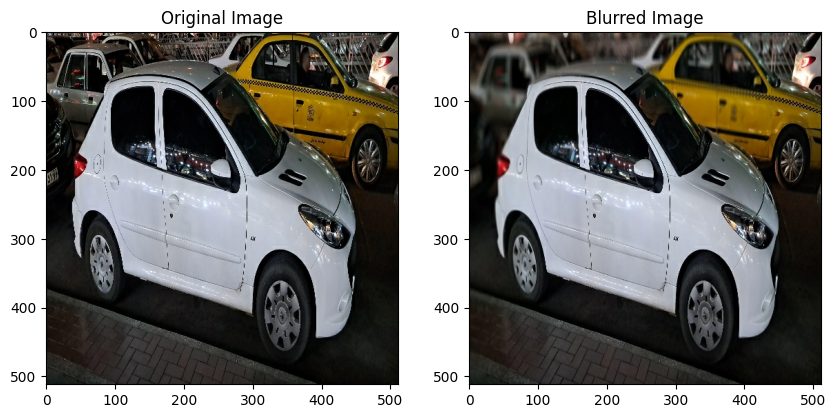

In [5]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

sample_dataset = tfds.load("tensorflow_portset", split="real_world", shuffle_files=True)
sample_dataset = sample_dataset.batch(1)

for sample in sample_dataset.take(1):
    orig_img = sample["input_image"]
    blur_img = sample["blurred_image"]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(orig_img[0])
    ax.set_title("Original Image")
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(blur_img[0])
    ax.set_title("Blurred Image")
    plt.show()

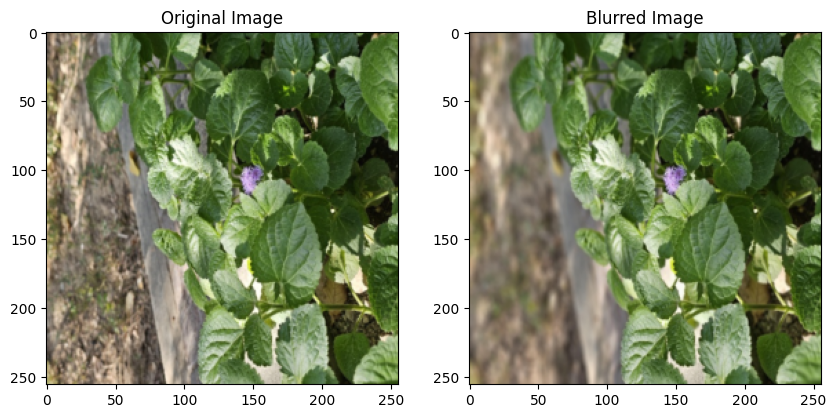

In [1]:
from torch_portset import PortsetDataset
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

sample_dataset = PortsetDataset(
    root="Dataset",
    transform=transforms.Compose(
        [transforms.Resize((256, 256)), transforms.ToTensor()]
    ),
    target_transform=transforms.Compose(
        [transforms.Resize((256, 256)), transforms.ToTensor()]
    ),
    split="real_world",
)

sample_loader = DataLoader(sample_dataset)

original_image, blurred_image = next(iter(sample_loader))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(original_image.squeeze(0).permute(1, 2, 0))
ax.set_title("Original Image")
ax = fig.add_subplot(1, 2, 2)
ax.imshow(blurred_image.squeeze(0).permute(1, 2, 0))
ax.set_title("Blurred Image")
plt.show()